In [1]:
import yfinance as yf

# Extract Tesla stock data
tesla = yf.Ticker("TSLA")

# Get Tesla stock data with the maximum period
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)

# Display first few rows
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [13]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Fetch the webpage content
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'
html_data = requests.get(url).text

# Step 2: Parse the webpage content using BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')

# Step 3: Find all the tables on the webpage
teslatables = soup.find_all('table')

# Step 4: Extract the table with Tesla Quarterly Revenue
# Using Pandas read_html to directly get the table (located at index 1)
tesla_revenue = pd.read_html(str(tables))[1]

# Step 5: Rename the columns for clarity
tesla_revenue.columns = ["Date", "Revenue"]

# Step 6: Clean the Revenue data by removing dollar signs and commas
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(',|\$', '', regex=True)

# Step 7: Drop rows with missing values
tesla_revenue.dropna(inplace=True)

# Step 8: Remove any empty revenue entries
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]

# Display the cleaned Tesla revenue data
print(tesla_revenue.tail())

          Date Revenue
48  2010-09-30      31
49  2010-06-30      28
50  2010-03-31      21
52  2009-09-30      46
53  2009-06-30      27


/tmp/ipykernel_216/2830877942.py:17: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tesla_revenue = pd.read_html(str(tables))[1]


In [14]:
import yfinance as yf

# Create a Ticker object for GameStop (GME)
gme = yf.Ticker("GME")

# Extract stock data and set the period to 'max'
gme_data = gme.history(period="max")

# Display the first few rows of the extracted stock data
gme_data.reset_index(inplace=True)

# Display first few rows
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666417,1.666417,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [17]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL for GameStop revenue data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Fetch the webpage content
html_data = requests.get(url).text

# Parse the webpage content using BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')

# Extract tables from the HTML
tables = pd.read_html(html_data)

# Assuming the GameStop revenue is in the second table, assign it to a dataframe
gamestop_revenue = tables[1]

# Rename the columns for clarity
gamestop_revenue.columns = ['Date', 'Revenue']

# Clean the 'Revenue' column by removing commas and dollar signs
gamestop_revenue["Revenue"] = gamestop_revenue['Revenue'].str.replace(',|\$', "", regex=True)

# Drop rows with missing values
gamestop_revenue.dropna(inplace=True)

# Remove any rows where the 'Revenue' column is empty
gamestop_revenue = gamestop_revenue[gamestop_revenue['Revenue'] != ""]

# Display the cleaned GameStop revenue data
print(gamestop_revenue.tail())

          Date Revenue
57  2006-01-31    1667
58  2005-10-31     534
59  2005-07-31     416
60  2005-04-30     475
61  2005-01-31     709


/tmp/ipykernel_216/265646970.py:15: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(html_data)


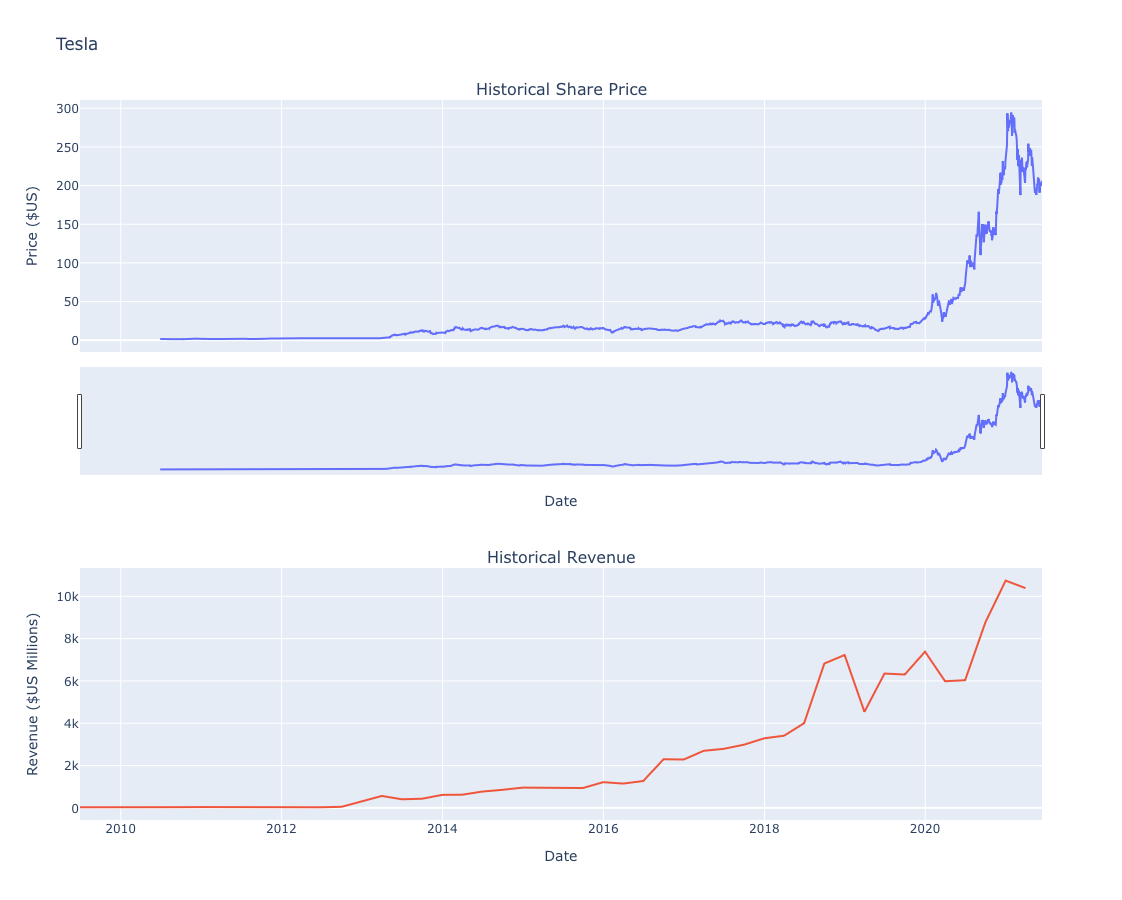

In [22]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

make_graph(tesla_data, tesla_revenue, 'Tesla')

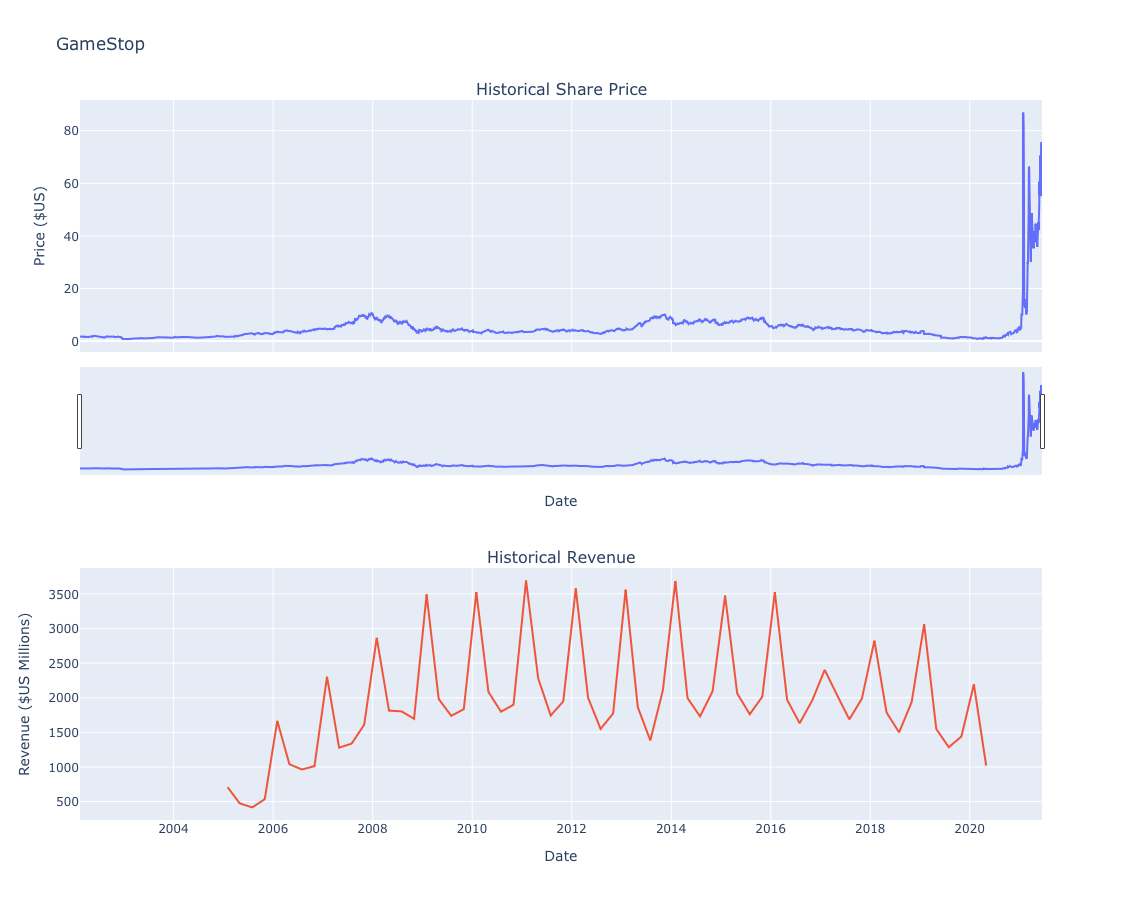

In [21]:
make_graph(gme_data, gamestop_revenue, 'GameStop')